<img src="./img/hu-logo.png" align="right" width="120">

# Machine Learning in Marketing
## Final Assignment 2020/21
This notebook provides a data-driven approach for optimising coupon allocation in a supermarket setting.



In [56]:
# !pip install nb-black
# !pip install pyarrow
# !pip install gensim
# !pip install pickle

  Using cached tsne-0.3.1.tar.gz (547 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
  Using cached tsne-0.3.0.tar.gz (547 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
  Using cached tsne-0.2.0.tar.gz (34 kB)
  Running setup.py clean for tsne
Failed to build tsne
    Running setup.py install for tsne: started
    Running setup.py install for tsne: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Christopher\anaconda3\python.exe' 'C:\Users\Christopher\AppData\Roaming\Python\Python38\site-packages\pip' install --ignore-installed --no-user --prefix 'C:\Users\Christopher\AppData\Local\Temp\pip-build-env-f44k6a9d\overlay' --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- setuptools setuptools_scm wheel 'cython >= 0.29' 'numpy==1.14.5; python_version<'"'"'3.7'"'"'' 'numpy==1.16.0; python_version>='"'"'3.7'"'"''
       cwd: None
  Complete output (578 lines):
  Ignoring numpy: markers 'python_version < "3.7"' don't match your environment
    Using cached setuptools-53.0.0-py3-none-any.whl (784 kB)
    Using cached setuptools_scm-5.0.1-py2.py3-none-any.whl (28 kB)
    Using cached wheel-0.36.2-py2.py3-none-any.whl (35 kB)
    Using cached Cython-0.29.21-cp38-cp38-win_amd64.whl (1.7 MB)
    Using cached numpy-1.16.0.zip (5.1 MB)
    ERROR: Command errored out with exit s

In [1]:
# import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

%load_ext lab_black

## I. Data Import

In [2]:
baskets = pd.read_parquet("./data/baskets.parquet")
coupons = pd.read_parquet("./data/coupons.parquet")
coupon_idx = pd.read_parquet("./data/coupon_index.parquet")

In [10]:
baskets.head()

,week,shopper,product,price
0,0,0,71,629
1,0,0,91,605
2,0,0,116,715
3,0,0,123,483
4,0,0,157,592


In [11]:
coupons.head()

,week,shopper,product,discount
0,0,0,35,35
1,0,0,193,40
2,0,0,27,30
3,0,0,177,35
4,0,0,5,30


In [12]:
coupon_idx.head()

,week,shopper,coupon
0,90,0,0
2000,90,0,1
4000,90,0,2
6000,90,0,3
8000,90,0,4


In [32]:
# sampling for playing around
# baskets_origin = baskets.copy()
baskets = baskets_origin  # [0 : round(len(baskets_origin) * 0.3)]

In [33]:
len(baskets)

68841598

## II. Data Preprocessing

In [34]:
def create_baskets(input_purchases):
    input_origin = input_purchases.copy()
    input_purchases = (
        input_purchases.groupby(by=["shopper", "week"])
        .agg({"product": lambda x: list(x), "price": sum})
        .reset_index(drop=False)
    )
    input_purchases = input_purchases.rename(columns={"product": "products"})
    input_purchases["basket_size"] = input_purchases["products"].apply(len)
    return input_purchases, input_origin


# baskets, baskets_origin = create_baskets(baskets)
baskets, _ = create_baskets(baskets)
baskets.head()

,shopper,week,products,price,basket_size
0,0,0,"[71, 91, 116, 123, 157, 167, 171, 184, 207, 225]",5908,10
1,0,1,"[71, 91, 130, 157, 167, 191, 225]",4109,7
2,0,2,"[52, 67, 71, 87, 91, 130, 184, 211, 238]",5108,9
3,0,3,"[71, 91, 123, 130, 179, 184, 214, 225]",4681,8
4,0,4,"[48, 67, 76, 91, 116, 123, 184, 225]",4740,8


In [41]:
with open("baskets_product_list.pickle", "wb") as handle:
    pickle.dump(baskets, handle)

In [3]:
with open("baskets_product_list.pickle", "rb") as handle:
    baskets = pickle.load(handle)

## III. P2V Approach

In [5]:
# from p2v_module import p2v
import p2v_module
import importlib

importlib.reload(p2v_module)

<module 'p2v_module' from 'C:\\Users\\Christopher\\Nextcloud2\\Documents\\Studium\\HU Berlin\\Master\\3. Semester\\MLiM\\Final Project\\p2v_module.py'>

In [45]:
product_vector_model = p2v_module.p2v(baskets["products"])
product_vector_model.create_product_list()

In [47]:
product_vector_model.train_p2v(vec_dim=30, epochs=100)

Epoch #0
Epoch #5
Epoch #10
Epoch #15
Epoch #20
Epoch #25
Epoch #30
Epoch #35
Epoch #40
Epoch #45
Epoch #50
Epoch #55
Epoch #60
Epoch #65
Epoch #70
Epoch #75
Epoch #80
Epoch #85
Epoch #90
Epoch #95


In [430]:
product_vector_model.get_insights(20)

30-dimensional vector for 20:
[ 16.91958     11.792615   -21.050528     7.352144     7.255684
   1.0665644    9.210043    -4.9053097    5.138174    -1.5399554
 -15.364899    -2.210627     1.158818     4.2922053    5.387418
   3.9973686   14.811209    -0.83350635   7.518798     5.9882135
 -11.342001     3.9756105  -16.87106      2.4546146   -3.8887858
 -10.50681      5.9898324    7.0195384   -4.0393276    7.58036   ]

Most similar products for 20:
[('29', 0.6650466322898865), ('23', 0.6482033729553223), ('22', 0.6268254518508911), ('27', 0.6112769246101379), ('25', 0.6083812713623047), ('21', 0.5770205855369568), ('26', 0.5235933065414429), ('28', 0.4557826519012451), ('24', 0.44312116503715515), ('232', 0.3516092002391815)]


In [118]:
# save backup
with open("product_vector_model.pickle", "wb") as handle:
    pickle.dump(product_vector_model, handle)

In [4]:
with open("product_vector_model.pickle", "rb") as handle:
    product_vector_model = pickle.load(handle)

## IV. TSNE & Clustering


In [89]:
from module_clustering import p2cluster

# importlib.reload(module_clustering)

In [84]:
p2cluster_model = p2cluster(product_vector_model.p2v_model)

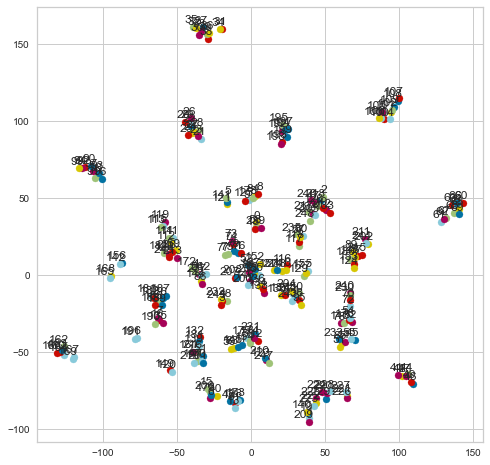

In [85]:
p2cluster_model.tsne_train()
p2cluster_model.tsne_plot()

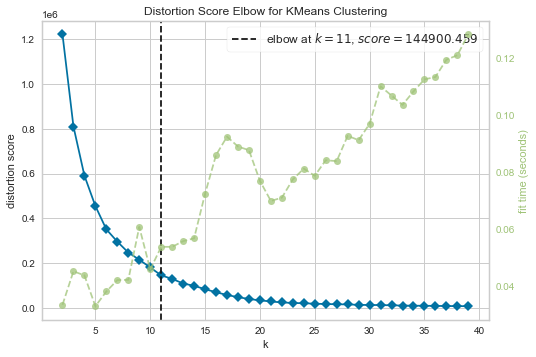

In [86]:
p2cluster_model.elbow_plot()

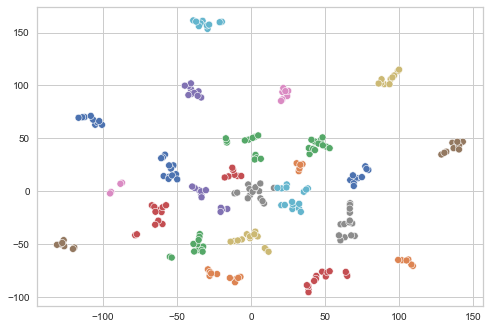

In [87]:
# set to 25 clusters
p2cluster_model.train_cluster(25)
p2cluster_model.clust_plot()

In [88]:
product_categories = p2cluster_model.get_categories()
product_categories.head()

,tsne_x,tsne_y,product,category_label
76,3.079960,34.391747,0,12
65,38.935280,-93.043007,1,3
175,48.395184,50.941959,2,22
206,-20.546894,-19.471403,3,24
37,-37.980141,3.057139,4,14


## V. Product frequency & Train/Test Split

In [129]:
baskets.head()

,shopper,week,products,price,basket_size
0,0,0,"[71, 91, 116, 123, 157, 167, 171, 184, 207, 225]",5908,10
1,0,1,"[71, 91, 130, 157, 167, 191, 225]",4109,7
2,0,2,"[52, 67, 71, 87, 91, 130, 184, 211, 238]",5108,9
3,0,3,"[71, 91, 123, 130, 179, 184, 214, 225]",4681,8
4,0,4,"[48, 67, 76, 91, 116, 123, 184, 225]",4740,8


In [131]:
len(baskets["shopper"].unique())

100000

In [171]:
from scipy.sparse import csr_matrix

total_frequency = csr_matrix((100000, 250), dtype=np.int8).toarray()

In [172]:
# get product frequency per customer
for index, row in baskets.iterrows():
    for p in row["products"]:
        total_frequency[row["shopper"]][p] += 1

In [91]:
total_frequency

array([[ 0,  0,  0, ...,  0,  0, 13],
       [ 6, 13,  0, ...,  0,  0,  6],
       [ 0, 46,  0, ...,  0,  9,  5],
       ...,
       [ 1,  2,  2, ...,  0,  9,  0],
       [ 0, 12,  2, ...,  0, 29,  0],
       [ 0,  0,  0, ...,  0, 53,  0]], dtype=int8)

In [103]:
# remove impact of last week (89)
from scipy.sparse import csr_matrix

total_frequency_without89 = csr_matrix((100000, 250), dtype=np.int8).toarray()
total_frequency_only89 = csr_matrix((100000, 250), dtype=np.int8).toarray()

total_frequency_without89 = total_frequency.copy()

for index, row in baskets[baskets["week"] == 89].iterrows():
    for p in row["products"]:
        total_frequency_without89[row["shopper"]][p] -= 1
        total_frequency_only89[row["shopper"]][p] += 1

In [104]:
# Train Data
total_frequency_without89

array([[ 0,  0,  0, ...,  0,  0, 13],
       [ 6, 13,  0, ...,  0,  0,  6],
       [ 0, 46,  0, ...,  0,  9,  5],
       ...,
       [ 1,  2,  2, ...,  0,  9,  0],
       [ 0, 12,  2, ...,  0, 29,  0],
       [ 0,  0,  0, ...,  0, 53,  0]], dtype=int8)

In [112]:
# Testing Data
total_frequency_only89

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [173]:
# save backup
with open("total_frequency.pickle", "wb") as handle:
    pickle.dump(total_frequency, handle)

In [90]:
with open("total_frequency.pickle", "rb") as handle:
    total_frequency = pickle.load(handle)

## VI. Weekly order frequency

In [287]:
# number of weeks between two purchases
90 / total_frequency.mean(axis=0)
# problematic, because too many zeros in total_frequency.
# zero = customer with no preference in this product

array([ 55.67928731,  16.76898855,  53.83773307, 141.80374362,
        41.48153611,  57.35370027,  38.51387783,  39.07929188,
        42.06590325,  46.27249357,  35.75898444,  23.18989951,
        51.93486214,  37.77084846,  55.31857352,  39.79202037,
        30.72983355,  90.73403837, 142.01183432,  45.0409873 ,
        48.95188574,  25.56731021,  19.95981424,  19.30758702,
       107.19773217,  61.34551155,  26.71558587, 194.89800338,
        19.95954865,  39.2161989 ,  55.66654502,  49.24194757,
        30.36283589,  33.5246723 ,  47.56368249,  37.26106343,
        53.62760988,  31.96613011,  21.26588739,  28.34627813,
        14.94785689,  28.65137956,  19.63689205,  44.99257622,
        55.89228935,  19.73407241,  22.1162825 ,  28.75114605,
        16.92852588,  31.7658644 ,  81.12054513,  57.43935362,
        69.9213773 ,  77.95244901, 189.90546928,  59.05240573,
        77.04226196,  88.898547  ,  47.47686821, 138.98111401,
        17.62024841,  47.77678685,  19.75672881,  28.52

In [114]:
# remove the customers with no preference
# ??median??
weeks_frequency_without89 = 90 / np.average(
    total_frequency_without89, weights=(total_frequency_without89 >= 2), axis=0
)
weeks_frequency_without89
# interpretation: The consumers who "like" product "0" usually buy it every 8-9 weeks

array([ 8.72481197,  5.5352245 ,  8.70385141, 16.21997199,  8.74139655,
       10.26169254,  8.24133608,  7.92547411,  8.50865924,  6.84131488,
        8.41147682,  6.96119892,  8.88659618,  8.25392988, 10.03134529,
        8.73249714,  7.84050609, 12.94019401, 16.64194877, 10.07280989,
        7.07744008,  6.33392265,  4.80209184,  4.8680443 , 12.01228637,
        8.08553517,  5.12903551, 12.72992629,  5.46894582,  7.3624563 ,
        9.98758674, 10.73000215,  6.77253571,  8.46681314,  8.27121951,
        8.7858235 , 10.12901581,  7.18702094,  6.42110962,  7.02686559,
        4.22821871,  5.06552082,  5.02013429,  8.92400643,  8.88746795,
        5.48992895,  5.94006805,  7.18419501,  5.33088626,  6.87760068,
       13.01133449, 11.71171171, 14.13030499, 15.57424228, 18.97404673,
       10.91543704, 13.69301547, 14.73679613, 11.60838305, 23.00428936,
        3.9431186 ,  7.0551769 ,  6.29401912,  6.66436027,  5.51252039,
        5.39152212,  6.82397291,  4.55955472,  6.79709278,  6.74

In [115]:
weeks_frequency_stddev = 90 / np.std(
    total_frequency, where=(total_frequency >= 2), axis=0
)
weeks_frequency_stddev

TypeError: _std_dispatcher() got an unexpected keyword argument 'where'

In [116]:
product_categories["weekly_frequency_mean"] = weeks_frequency_without89
# product_categories["weekly_frequency_stddev"] = weeks_frequency_stddev
product_categories

,tsne_x,tsne_y,product,category_label,weekly_frequency_mean
76,3.079960,34.391747,0,12,8.724812
65,38.935280,-93.043007,1,3,5.535225
175,48.395184,50.941959,2,22,8.703851
206,-20.546894,-19.471403,3,24,16.219972
37,-37.980141,3.057139,4,14,8.741397
...,...,...,...,...,...
140,-55.695065,11.731397,245,20,10.851525
213,40.855968,48.695030,246,22,6.474173
223,11.888278,-57.106277,247,18,11.451921
115,39.608067,35.193974,248,22,5.796597


## VII.Category differences in order frequency

In [117]:
category_frequency = (
    product_categories[
        ["category_label", "weekly_frequency_mean"]  # , "weekly_frequency_stddev"]
    ]
    .groupby(by="category_label")
    .agg("mean")
)

In [118]:
category_frequency

,weekly_frequency_mean
category_label,
0,7.167777
1,11.415770
2,10.326829
3,7.505887
4,7.386968
5,5.978402
6,7.738682
7,9.467979
8,6.848620


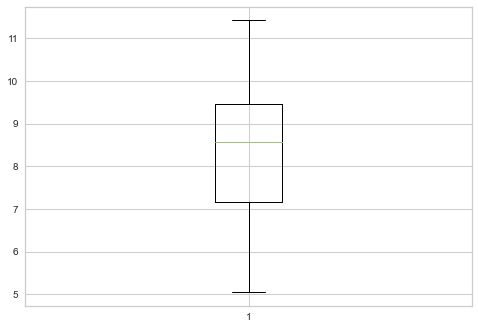

In [119]:
_ = plt.boxplot(category_frequency["weekly_frequency_mean"])

## VIII. Consumers' Preference

In [124]:
# example
total_frequency_without89[2]

array([ 0, 46,  0,  0,  0,  0,  5,  0,  0,  2,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  4,  0, 23,  0,  1,  2,  0,  1,  1,  0,  0,  2,
        0,  0,  0,  0, 24,  0,  2,  0, 14,  0, 13,  0,  0,  0,  0,  0,  3,
       11,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  8,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       12,  0,  0, 14,  0,  0,  0,  0,  0,  1,  0,  1, 10,  0,  0,  0, 10,
        0,  0,  0,  0,  2,  0,  1,  0,  0,  5,  0,  0,  0,  6,  0,  0,  0,
       25,  0, 21,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  2,  0,  0,
        2,  2,  0,  0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, 39,  0,  0,  0, 36,  0,  0,  0,  0,  2,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  0,  1,  0,  0,  0,
        0,  0,  1,  0,  4,  1, 31,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,
        0, 24,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12,  1,  0,  0,
        0,  0,  0,  0,  0

In [122]:
def create_consumer_preferences(min_frequency):
    cons_preferences = dict()
    for consumer in range(0, 100000):
        cons_preferences[consumer] = list()
        for prod in range(0, 250):
            if total_frequency_without89[consumer][prod] >= min_frequency:
                cons_preferences[consumer].append(prod)
    return cons_preferences


preferences = create_consumer_preferences(min_frequency=3)
# once / twice = you didn't like it
# more than two times = seems to be part of your preference

In [123]:
for i in range(5):
    print(f"{i}:\n{preferences[i]}")

0:
[4, 11, 16, 38, 52, 56, 67, 71, 76, 81, 87, 91, 110, 116, 123, 130, 148, 157, 167, 171, 179, 181, 184, 191, 202, 207, 210, 211, 214, 225, 238, 244, 249]
1:
[0, 1, 4, 21, 22, 28, 33, 35, 36, 39, 42, 48, 50, 53, 63, 78, 83, 92, 94, 111, 116, 117, 125, 136, 142, 145, 146, 149, 156, 165, 168, 171, 182, 183, 189, 193, 199, 200, 209, 211, 212, 220, 228, 229, 235, 249]
2:
[1, 6, 22, 24, 38, 42, 44, 50, 51, 63, 85, 88, 97, 101, 111, 115, 119, 121, 141, 160, 164, 181, 191, 193, 205, 217, 228, 230, 240, 248, 249]
3:
[4, 6, 7, 13, 14, 22, 23, 26, 27, 28, 29, 30, 32, 37, 40, 42, 45, 55, 62, 64, 65, 67, 76, 85, 92, 98, 101, 105, 106, 109, 119, 120, 122, 123, 134, 137, 145, 147, 149, 152, 158, 159, 163, 166, 170, 188, 192, 193, 197, 202, 206, 208, 229, 235, 248, 249]
4:
[2, 13, 19, 25, 30, 76, 91, 98, 105, 106, 112, 120, 136, 149, 152, 156, 166, 188, 197, 199, 209, 210, 217, 219, 234]


## IX. Define Target and Train

In [319]:
# maximal window of the past
max(weeks_frequency)

23

In [303]:
weeks_frequency

array([ 8.66297992,  5.48733034,  8.65227542, 16.13992441,  8.67178882,
       10.19479734,  8.17960173,  7.86057692,  8.43815432,  6.79831563,
        8.34982252,  6.90411737,  8.82202745,  8.18857235,  9.9568488 ,
        8.66594524,  7.77681464, 12.87443417, 16.54142513,  9.99853802,
        7.02641109,  6.28210721,  4.76086751,  4.82739912, 11.92664238,
        8.03350675,  5.08792366, 12.66474314,  5.42392808,  7.312434  ,
        9.92143095, 10.6453226 ,  6.72235382,  8.40447849,  8.20927516,
        8.72246867, 10.06583424,  7.12881051,  6.36728289,  6.97655857,
        4.19177875,  5.02369191,  4.97894601,  8.86649202,  8.82747058,
        5.44712546,  5.89422076,  7.12942897,  5.28702828,  6.82739899,
       12.90363313, 11.60628584, 14.02620711, 15.48261855, 18.84801403,
       10.82527617, 13.60096207, 14.62288967, 11.50993691, 22.88688093,
        3.90929826,  7.0032024 ,  6.24449984,  6.61423248,  5.46771271,
        5.35216403,  6.7767478 ,  4.52096889,  6.75230196,  6.69

In [304]:
total_frequency_without89

array([[ 0,  0,  0, ...,  0,  0, 13],
       [ 6, 13,  0, ...,  0,  0,  6],
       [ 0, 46,  0, ...,  0,  9,  5],
       ...,
       [ 1,  2,  2, ...,  0,  9,  0],
       [ 0, 12,  2, ...,  0, 29,  0],
       [ 0,  0,  0, ...,  0, 53,  0]], dtype=int8)

In [309]:
# our target: week 89
baskets[baskets["week"] == 89][["shopper", "week", "products"]].head(5)

,shopper,week,products
89,0,89,"[67, 71, 91, 123, 167, 179, 184, 211, 225, 238]"
179,1,89,"[28, 63, 78, 165, 182, 199, 212]"
269,2,89,"[38, 119, 160]"
359,3,89,"[11, 30, 42, 92, 109, 119, 134, 145, 166, 192]"
449,4,89,"[19, 76, 105, 120, 149, 156, 188, 199, 209]"


In [318]:
week_idx = 89
shopper_idx = 1
baskets[(baskets["week"] == week_idx) & (baskets["shopper"] == shopper_idx)][
    ["products"]
]

,products
179,"[28, 63, 78, 165, 182, 199, 212]"


In [ ]:
# for each product in preferences of consumer:
#     get average weeks
#     for woche88 downto woche88minusAverage:
#         if product in basketsOfConsumer: 
#             # was ist wenn er es gekauft hat?
#             #--> he/she is satisfied!
#         else:
#             # was ist wenn er es nicht gekauft hat?
#             #--> he/she needs it maybe

In [125]:
# get a matrix of weeks since last order for each consumer + product
weeks_since_last_order = csr_matrix((100000, 250), dtype=np.int8).toarray()
weeks_since_last_order = weeks_since_last_order - 1
weeks_since_last_order

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]], dtype=int8)

In [126]:
# takes about 5 minutes to run
week_idx = 88
shopper_idx = 0

# for the last weeks
while week_idx > 88 - max(weeks_frequency):

    # for each consumer
    for index, row in baskets[(baskets["week"] == week_idx)].iterrows():
        # for each product
        for p in row["products"]:
            if weeks_since_last_order[row["shopper"]][p] == -1:
                weeks_since_last_order[row["shopper"]][p] = 88 - week_idx

    week_idx -= 1

weeks_since_last_order

array([[-1, -1, -1, ..., -1, -1,  3],
       [ 7,  8, -1, ..., -1, -1,  0],
       [-1,  0, -1, ..., -1, -1, -1],
       ...,
       [-1, 18, -1, ..., -1,  0, -1],
       [-1,  8,  3, ..., -1,  0, -1],
       [-1, -1, -1, ..., -1,  0, -1]], dtype=int8)

In [127]:
weeks_since_last_order[1][35:40]  # consumer 1

array([16,  0, 20, -1, 12], dtype=int8)

In [129]:
weeks_frequency[34:40]  # average consumer

array([ 8.20927516,  8.72246867, 10.06583424,  7.12881051,  6.36728289,
        6.97655857])

In [130]:
consumer_needs_product = csr_matrix((100000, 250), dtype=np.int8).toarray()
rnd_weeks_frequency = weeks_frequency.round()

for cons in range(100000):
    for prod in range(250):
        if weeks_since_last_order[cons][prod] == -1:
            continue
        else:
            consumer_needs_product[cons][prod] = (
                weeks_since_last_order[cons][prod] - rnd_weeks_frequency[prod]
            )

consumer_needs_product  # the higher consumer_needs_product[i,j], the higher the need for product P[i,j]

array([[ 0,  0,  0, ...,  0,  0, -3],
       [-2,  3,  0, ...,  0,  0, -6],
       [ 0, -5,  0, ...,  0,  0,  0],
       ...,
       [ 0, 13,  0, ...,  0, -6,  0],
       [ 0,  3, -6, ...,  0, -6,  0],
       [ 0,  0,  0, ...,  0, -6,  0]], dtype=int8)

In [247]:
consumer_needs_product[0] #shopper 0

array([  0,   0,   0,   0,   9,   0,   0,   0,   0,   0,   0,  -3,   0,
         0,   0,   0,  -8,   0,   0,   0,   0,  -4,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  10,   0,   0,   0,
       -11,   0,   0,   0,  -9,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  -5,   0,   0,   0,  -7,   0,   0,   0,   0,  -3,   0,
         0,   7,   0,   0,   0,   0,   0,   0,   0,  -8,   0,   0,   0,
        -7,   0,   0,   0,   0,   0,   0,   0,   0,  -3,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  -2,   0,   0,   0,   0,   0,  -3,
         0,   0,   7,   0,   0,   0,  -1,   0,   0,   0,   0,   0,   0,
        -6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  -8,   0,   0,   0,   0,   0,   0,   0,   0,   0,  -2,   0,
         0,   0,  -4,   0,   0,   0,   0,   0,   0,   0,  -1,   

In [131]:
print(weeks_since_last_order[1][:5])
print(rnd_weeks_frequency[:5])
print(consumer_needs_product[1][:5])
# interpretation for consumer 1:

# product 0 has been bought 7 weeks ago
# product 2 has never been bought

# over all consumers, product 0 is bought on average every 9 weeks

# => consumer doesn't need product 0 right now
# => product 1 should have been bought till now...maybe motivate him?
# => no preference in product 2,3

[ 7  8 -1 -1  1]
[ 9.  5.  9. 16.  9.]
[-2  3  0  0 -8]


In [421]:
print("consumer \tproduct \t overdue")
for idx, consumer in enumerate(consumer_needs_product):
    #     print(np.where(consumer == np.max(consumer)), np.max(consumer_needs_product))
    print(
        f" {idx}  \t\t{np.where(consumer == np.max(consumer))[0]}    \t {np.max(consumer)}"
    )
    if idx > 15:
        break

consumer 	product 	 overdue
 0  		[211]    	 12
 1  		[ 37 154]    	 13
 2  		[180]    	 10
 3  		[165]    	 15
 4  		[88]    	 14
 5  		[171]    	 10
 6  		[76]    	 19
 7  		[248]    	 10
 8  		[189 225]    	 15
 9  		[40]    	 18
 10  		[199]    	 17
 11  		[99]    	 16
 12  		[228]    	 14
 13  		[75]    	 12
 14  		[92]    	 14
 15  		[129 217]    	 13
 16  		[202]    	 16


In [397]:
np.where(consumer_needs_product[0] == consumer_needs_product[0].max())[0][0]

211

## Evaluation Target

In [202]:
# number of overdue weeks (based on product average)
consumer_needs_product[1][:10].tolist()
# negative = you've just bought it
# 0 = never bought it / no direction
# positive = you should have bought it till now...

[-2, 3, 0, 0, -8, 0, 0, 0, 0, 0]

In [200]:
# which products did he/she really buy?
np.where(total_frequency_only89[1] == 1)[0].tolist()

[28, 63, 78, 165, 182, 199, 212]

In [235]:
# which products are overdue
print(
    f"overdue products: {np.where(consumer_needs_product[1] > 1)[0].tolist()}"
)  # 28, 165
print(
    f"overdue weeks: {consumer_needs_product[1][consumer_needs_product[1] > 1].tolist()}"
)

overdue products: [1, 28, 33, 35, 37, 39, 42, 136, 154, 165, 186, 189, 193]
overdue weeks: [3, 2, 10, 7, 13, 5, 2, 5, 13, 5, 2, 5, 2]


In [214]:
# which products are overdue and truely bought
truely_bought = set.intersection(
    set(np.where(total_frequency_only89[1] == 1)[0].tolist()),
    set(np.where(consumer_needs_product[1] > 1)[0].tolist()),
)
truely_bought

{28, 165}

In [236]:
def intersection_between_overdueWeeks_boughtInWeek89(consumer_num=1):
    print(f"---consumer {consumer_num}---")
    truely_bought = set.intersection(
        set(np.where(total_frequency_only89[consumer_num] == 1)[0].tolist()),
        set(np.where(consumer_needs_product[consumer_num] > 1)[0].tolist()),
    )
    if len(truely_bought) > 0:
        print(truely_bought)
    for p in truely_bought:
        print(f"Product {p}: {consumer_needs_product[consumer_num][p]} weeks overdue")
    print("\n")


for cons in range(10):
    intersection_between_overdueWeeks_boughtInWeek89(cons)

---consumer 0---
{211}
Product 211: 12 weeks overdue


---consumer 1---
{28, 165}
Product 28: 2 weeks overdue
Product 165: 5 weeks overdue


---consumer 2---


---consumer 3---
{109}
Product 109: 10 weeks overdue


---consumer 4---
{105}
Product 105: 7 weeks overdue


---consumer 5---


---consumer 6---
{76}
Product 76: 19 weeks overdue


---consumer 7---


---consumer 8---


---consumer 9---
{172}
Product 172: 12 weeks overdue




In [244]:
target_matrix = csr_matrix((100000, 250), dtype=np.int8).toarray()
target_matrix = target_matrix - 1
target_matrix

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]], dtype=int8)

In [245]:
for c in range(100000):
    for p in range(250):
        # in preference
        if consumer_needs_product[c][p] != 0:
            target_matrix[c][p] = target_matrix[c][p] + 1
        # overdue
        if consumer_needs_product[c][p] > 1:
            target_matrix[c][p] = target_matrix[c][p] + 1
        # not bought
        if total_frequency_only89[c][p] == 1:
            target_matrix[c][p] = target_matrix[c][p] - 1

target_matrix

array([[-1, -1, -1, ..., -1, -1,  0],
       [ 0,  1, -1, ..., -1, -1,  0],
       [-1,  0, -1, ..., -1, -1, -1],
       ...,
       [-1,  1, -1, ..., -1,  0, -1],
       [-1,  1,  0, ..., -1,  0, -1],
       [-1, -1, -1, ..., -1,  0, -1]], dtype=int8)

In [246]:
target_matrix[1]

array([ 0,  1, -1, -1,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0,
       -1, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  1,
       -1,  1,  0,  1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1,  0, -1,  0,
       -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  1,
       -1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1

### Check with Instacard Data

In [132]:
instacard_prod = pd.read_parquet("../Assignment 2/products.parquet")
instacard_baskets = pd.read_parquet("../Assignment 2/baskets.parquet")

In [133]:
baskets_prod = pd.merge(
    instacard_baskets, instacard_prod, on="product_id", how="inner"
)[["order_id", "product_id", "product_name"]].sort_values(by="order_id")
baskets_prod.head()

,order_id,product_id,product_name
0,2,33120,Organic Egg Whites
90017,2,30035,Natural Sweetener
90586,2,17794,Carrots
163322,2,40141,Original Unflavored Gelatine Mix
164511,2,43668,Classic Blend Cole Slaw


In [134]:
baskets_prod = (
    baskets_prod.groupby(by=["order_id"])
    .agg({"product_name": lambda x: list(x)})
    .reset_index(drop=False)
)
baskets_prod.head()

,order_id,product_name
0,2,"[Organic Egg Whites, Natural Sweetener, Carrot..."
1,3,"[Organic Ginger Root, Unsweetened Almondmilk, ..."
2,4,[Nutri-Grain Soft Baked Strawberry Cereal Brea...
3,5,"[Fresh Fruit Salad, Bag of Organic Bananas, Or..."
4,6,"[Cleanse, Clean Day Lavender Scent Room Freshe..."


In [135]:
len(baskets)

8998639

In [136]:
len(baskets_prod["product_name"])

3214874

In [138]:
instacard_model = p2v_module.p2v(
    baskets_prod["product_name"][0 : round(len(baskets_prod["product_name"]) * 0.4)]
)

In [139]:
instacard_model.train_p2v(vec_dim=30)

Epoch #0
Epoch #5
Epoch #10
Epoch #15
Epoch #20
Epoch #25
Epoch #30
Epoch #35
Epoch #40
Epoch #45
Epoch #50
Epoch #55
Epoch #60
Epoch #65
Epoch #70
Epoch #75
Epoch #80
Epoch #85
Epoch #90
Epoch #95


In [141]:
instacard_model.get_insights(baskets_prod["product_name"][90][0])

30-dimensional vector for French Roast Ground Coffee:
[ 1.7180638  -0.12034872 -1.8990312   2.7531092  -2.2036414   2.9235969
  0.2993449  -1.7769756   5.6733127  -1.4637663  -1.7022265   0.6108069
  3.6607072  -0.3554418  -4.476004    1.5882661  -2.1975753  -1.8946065
  3.6750557   1.682603   -4.759963    0.10097343  0.6998822   1.5350183
  1.9565278   5.800726    2.1492074   4.701365    2.4183118   0.85594213]

Most similar products for French Roast Ground Coffee:
[("Major Dickason's Blend Ground Coffee Dark Roast", 0.9620715379714966), ('House Blend Deep Roast Ground Coffee', 0.9075503945350647), ("Major Dickason's Blend Whole Bean Coffee", 0.8885694742202759), ('Premium Unsweetened Iced Tea', 0.8031689524650574), ('French Roast Whole Bean Coffee', 0.7519914507865906), ('Organic Bread with 21 Whole Grains', 0.7518894076347351), ('Whipped Butter', 0.739040195941925), ('Organic Blues Bread with Blue Cornmeal Crust', 0.7385781407356262), ('Milk, Reduced Fat, 2% Milkfat', 0.727521419525

In [144]:
instacard_model.get_insights("Organic Banana")

30-dimensional vector for Organic Banana:
[-0.5633981   5.5976977  -2.4514678  -3.0207815  -3.8388429  -4.2620745
  1.4585373   1.3927897  -4.350912   -1.0897061   2.0381918  -6.3734136
  0.5369428  -2.30432     2.5826333  -3.5172808  -0.33155656  1.4000391
 -3.5757558   0.05541688 -4.9772625   2.1230972   1.2248759  -0.36993122
 -2.9201722  -1.6521841   4.878766    1.2921991  -2.759602   -2.3629959 ]

Most similar products for Organic Banana:
[('Organic Red Grapefruit', 0.8083233833312988), ('Organic Red Anjou Pear', 0.7785033583641052), ('Red Beet Bunch', 0.7673683762550354), ('Organic Celery Bunch', 0.7268636226654053), ('Sumo Mandarin', 0.7254788875579834), ('Plain Organic Grassmilk Yogurt Cup', 0.7236841320991516), ('Organic Pink Lady (Cripps) Apple', 0.7144590020179749), ('Purple Sweet Potato (Yam)', 0.7090426087379456), ('Citrus Mandarins Organic', 0.7070361375808716), ('Organic Cashew Nondairy Blueberry Yogurt', 0.7033405900001526)]


In [146]:
instacard_p2cluster_model = p2cluster(instacard_model.p2v_model)

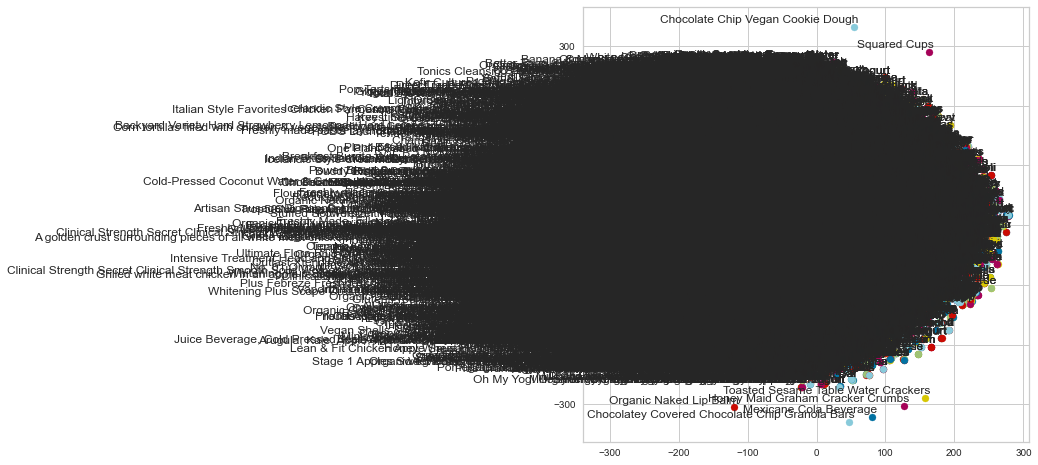

In [147]:
instacard_p2cluster_model.tsne_train()
instacard_p2cluster_model.tsne_plot()

In [ ]:
instacard_p2cluster_model.elbow_plot()

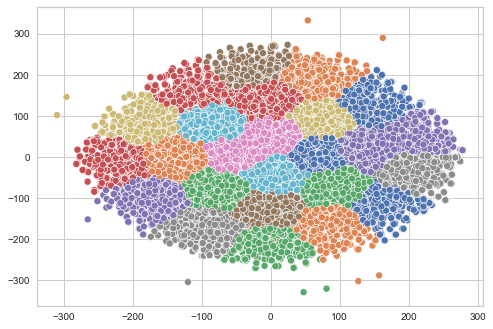

In [148]:
# set to 25 clusters
instacard_p2cluster_model.train_cluster(25)
instacard_p2cluster_model.clust_plot()

In [157]:
instacard_product_categories = {
    "tsne_x": instacard_p2cluster_model.x,
    "tsne_y": instacard_p2cluster_model.y,
    "product": instacard_p2cluster_model.labels,
    "category_label": instacard_p2cluster_model.kmeans.predict(
        np.column_stack((instacard_p2cluster_model.x, instacard_p2cluster_model.y))
    ),
    "tmp_sort": instacard_p2cluster_model.labels,
}
instacard_product_categories = pd.DataFrame(data=product_categories)
# product_categories["tmp_sort"] = product_categories["tmp_sort"].astype(float)
instacard_product_categories = instacard_product_categories.sort_values(
    by="category_label"
)
# del product_categories["tmp_sort"]
# return product_categories

In [177]:
instacard_product_categories[instacard_product_categories["category_label"] == 24]

,tsne_x,tsne_y,product,category_label,tmp_sort
6919,153.246536,-20.969738,Reduced Fat Sliced Swiss Cheese,24,Reduced Fat Sliced Swiss Cheese
2413,118.974113,60.072914,New Orleans Style Original Red Beans and Rice Mix,24,New Orleans Style Original Red Beans and Rice Mix
515,172.365036,19.216063,Mini Sweet Peppers,24,Mini Sweet Peppers
11029,114.974869,-11.218784,Lightly Salted Cashews Halves & Pieces,24,Lightly Salted Cashews Halves & Pieces
14762,158.667252,14.983466,Fresh Cut Blue Lake No Salt Added Cut Green Beans,24,Fresh Cut Blue Lake No Salt Added Cut Green Beans
...,...,...,...,...,...
21956,154.176651,37.892723,Peanut Butter Sliced Apples,24,Peanut Butter Sliced Apples
21955,155.014694,20.446537,Pop-Tarts Frosted Raspberry Toaster Pastries,24,Pop-Tarts Frosted Raspberry Toaster Pastries
14167,162.609787,49.221481,Pizzeria Thin Crust Primo Pepperoni Pizza,24,Pizzeria Thin Crust Primo Pepperoni Pizza
17875,113.669960,-18.921953,White Paper 8-12 Cups Basket Coffee Filters,24,White Paper 8-12 Cups Basket Coffee Filters


In [150]:
instacard_product_categories = instacard_p2cluster_model.get_categories()
instacard_product_categories.head()

ValueError: could not convert string to float: 'Organic Egg Whites'